# Deep Learning Lab Exercises

## Exercise 1: Understanding MLPs and Network Architecture

1. Complete the code to train each architecture for 50 epochs
2. Record training and validation accuracy for each
3. Plot the learning curves
4. Explain which architecture performed best and why


In [14]:
#%pip install TensorFlow
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Load and prepare data
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to create and evaluate model
def create_model(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='relu', input_shape=(4,)))
    for size in layer_sizes[1:-1]:
        model.add(Dense(size, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

# Try different architectures
architectures = [
    [10, 3],
    [20, 10, 3],
    [30, 20, 10, 3]
]


for arch in architectures:
    model = create_model(arch)
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=50,verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)



/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 0s - 15ms/step - accuracy: 0.3000 - loss: 2.0727

Test accuracy: 0.30000001192092896
1/1 - 0s - 14ms/step - accuracy: 0.6000 - loss: 0.7036

Test accuracy: 0.6000000238418579
1/1 - 0s - 19ms/step - accuracy: 1.0000 - loss: 0.4651

Test accuracy: 1.0



## Exercise 2: Impact of Batch Size and Learning Rate
Using the best architecture from Exercise 1, explore how batch size and learning rate affect training:

Tasks:
1. Create a grid of experiments testing different batch sizes and learning rates
2. Plot training curves for each combination
3. Analyze how these parameters affect:
   - Training speed
   - Final accuracy
   - Stability of training

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


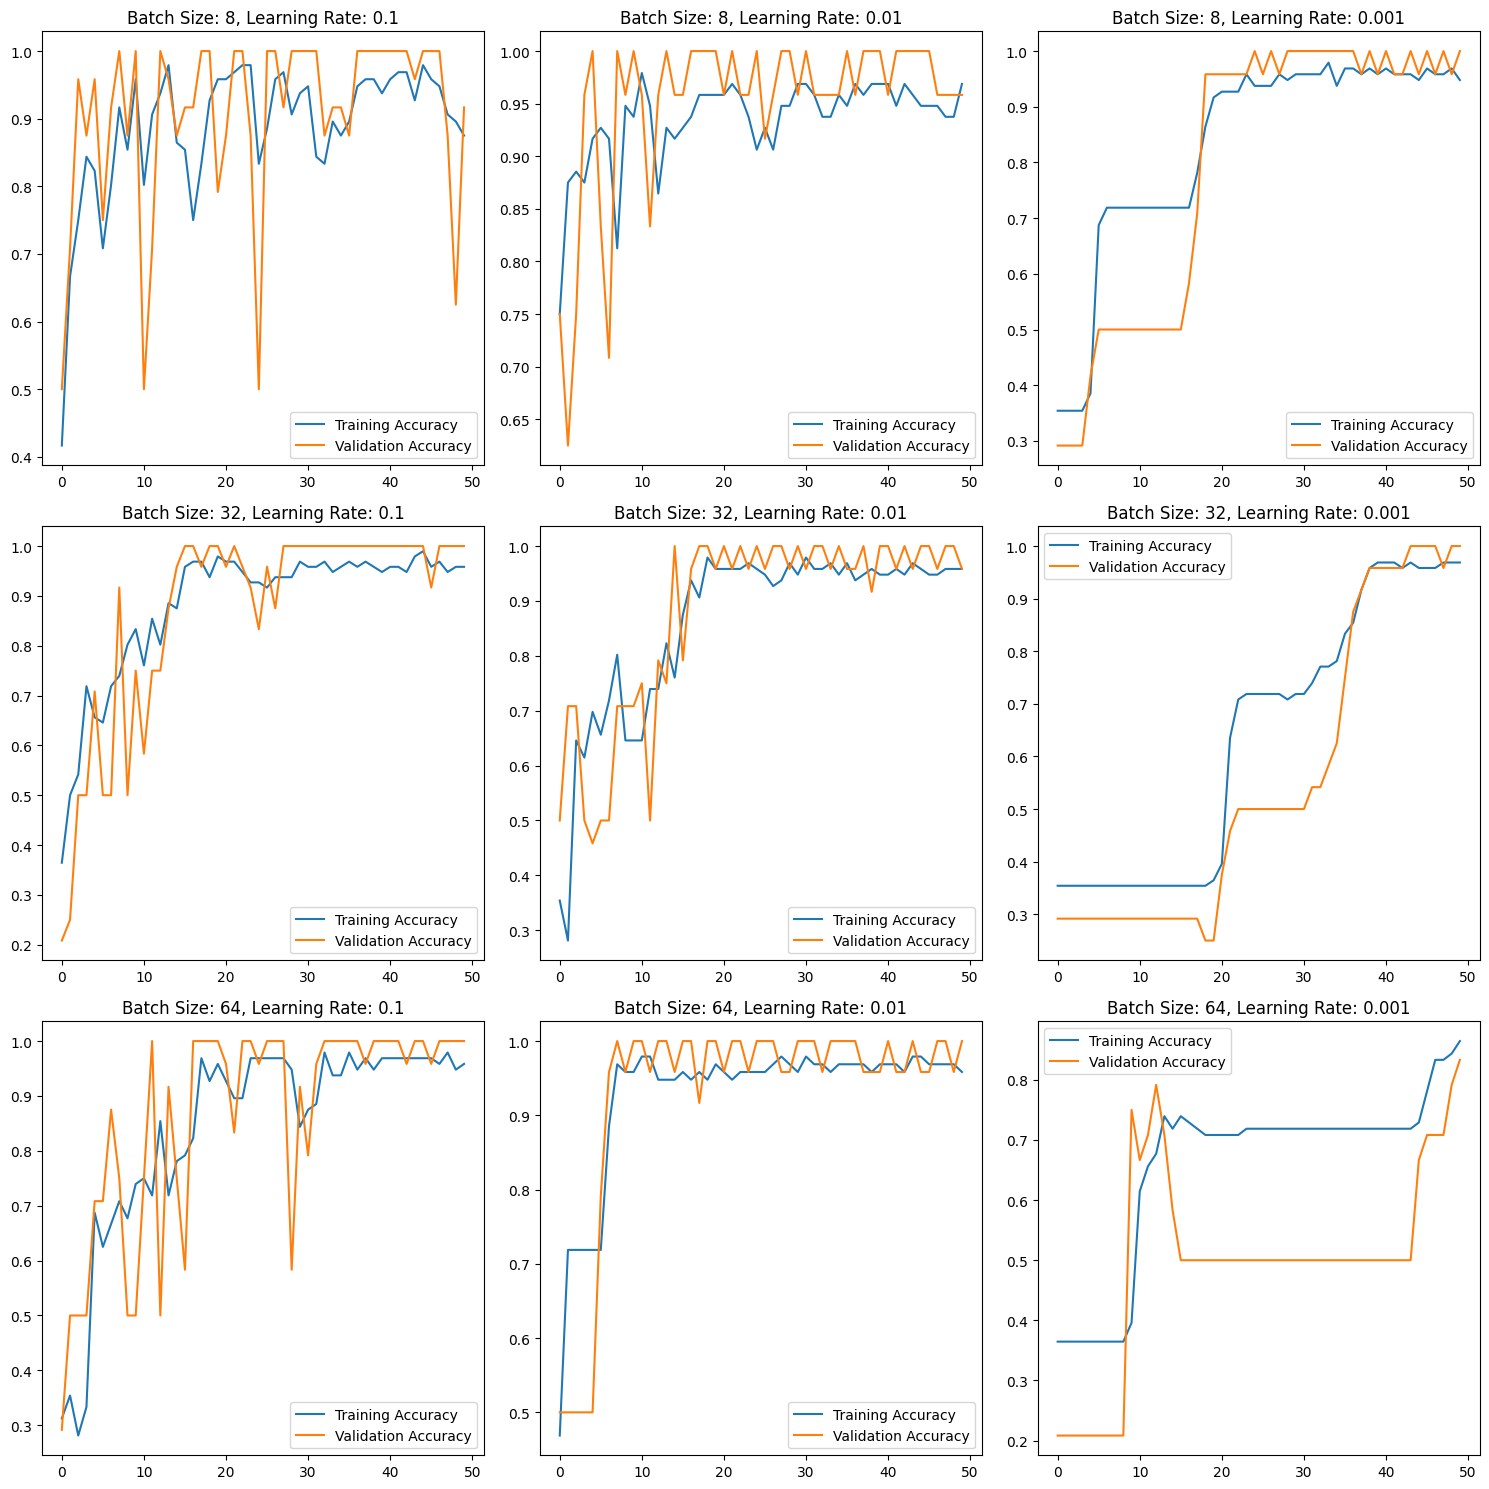

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Define the list of batch sizes and learning rates
batch_sizes = [8, 32, 64]
learning_rates = [0.1, 0.01, 0.001]

def train_model(batch_size, lr):
    model = create_model([30, 20, 10, 3])  # Assuming create_model is defined elsewhere
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=50,
                        validation_split=0.2,
                        verbose=0)
    return history


fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, b in enumerate(batch_sizes):
    for j, lr in enumerate(learning_rates):
        history = train_model(b, lr)
        ax = axes[i, j]
        ax.plot(history.history["accuracy"], label="Training Accuracy")
        ax.plot(history.history["val_accuracy"], label="Validation Accuracy")
        ax.set_title(f"Batch Size: {b}, Learning Rate: {lr}")
        ax.legend()

plt.tight_layout()
plt.show()



## Exercise 3: Comparing MLPs with Traditional Models

1. Complete the MLP comparison code
2. Run comparisons on both datasets
3. Explain why each model performs better or worse on each dataset


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

# Dataset 1: Wisconsin Breast Cancer dataset (good for traditional ML)
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_c, y_c = cancer.data, cancer.target

# Dataset 2: Fashion MNIST subset (good for neural networks)
# Only use 1000 samples to keep training time reasonable
from tensorflow.keras.datasets import fashion_mnist
(X_train_full, y_train_full), (X_test_full, y_test_full) = fashion_mnist.load_data()
X_f = X_train_full[:1000].reshape(1000, -1) / 255.0
y_f = y_train_full[:1000]

# Function to compare models
def compare_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Random Forest
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train_scaled, y_train)
    rf_score = rf.score(X_test_scaled, y_test)
    
    # MLP
    # Complete this code
    
    return rf_score, mlp_score



## Exercise 4: Early Stopping and Overfitting (15 minutes)

1. Train the model without early stopping for 200 epochs
2. Implement early stopping with appropriate parameters
3. Compare training curves and final test performance
4. Visualize decision boundaries for both models


In [ ]:

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.datasets import make_moons

# Generate a small noisy dataset prone to overfitting
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create an intentionally complex model
def create_complex_model():
    model = Sequential([
        Dense(100, activation='relu', input_shape=(2,)),
        Dense(100, activation='relu'),
        Dense(100, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
